# Dimensionality Reduction
Computer vision often deals with high dimensional data. As the dimensions of data increase so do its features (More dimensions also act as noise rather than features).
Dimensionality reduction is important in CV as it reduces the number of input variables,  making the CV algorithms faster and more efficient.
In this notebook we will explore dimensionality reduction with Principal Component Analysis and T- Distributed Stochastic Neighbourhood embedding (T-SNE).

Let's begin by loading the MNIST  (Modified National Institute of Standards and Technology) Dataset- a large database of handwritten digits that is commonly used for training various image processing systems.

Download the MNIST Dataset from https://www.kaggle.com/c/digit-recognizer/data

In [40]:
# Functions to read and show images.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.manifold import TSNE

d0 = pd.read_csv('D:\Dropbox\Personal\mdc cris\spring 2024\CV\w 3\mnist_train.csv')

print(d0.head(5)) # print first five rows of d0.

# save the labels into a variable l.
l = d0['label']

# Drop the label feature and store the pixel data in d.
d = d0.drop("label",axis=1)

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [41]:
print(d.shape)
print(l.shape)

(60000, 784)
(60000,)


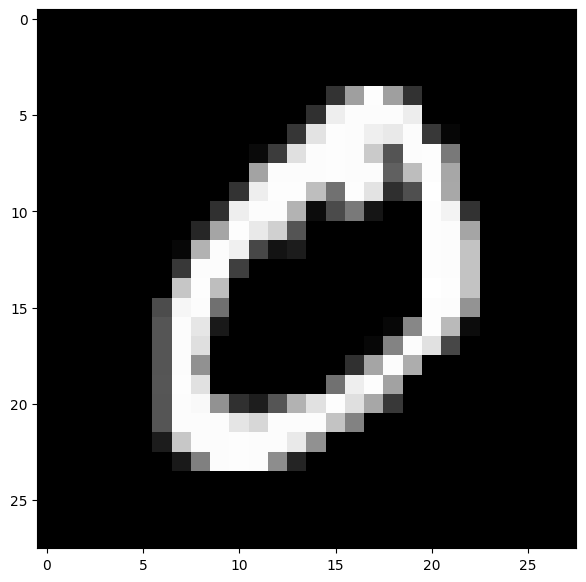

0


In [42]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 1

grid_data = d.iloc[idx].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])

# Principal Component Analysis (PCA) for 2D visualization
 
Principal Component Analysis(PCA) is a linear dimension reduction algorithm. It is a projection based method that transforms the data by projecting it onto a set of orthogonal(perpendicular) axes. 

Let us further explore PCA with the MNIST dataset. In this segment we are using PCA only to visualize the data. 

In [43]:
# Pick first 15K data-points to work on for time-effeciency.
# Excercise: Perform the same analysis on all of 42K data-points.

labels = l.head(15000)
data = d.head(15000)

print("the shape of sample data = ", data.shape)


the shape of sample data =  (15000, 784)


In [44]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(grid_data)
print(standardized_data.shape)


(28, 28)


In [45]:
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of variance matrix = ", covar_matrix.shape)


The shape of variance matrix =  (28, 28)


In [46]:
# finding the top two eigen-values and corresponding eigen-vectors. 
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh 

# the parameter 'eigvals' is defined (low value to heigh value). 
# eigh function will return the eigen values in asending order.
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(0,2))

print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations.
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector.
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector.

Shape of eigen vectors =  (28, 3)
Updated shape of eigen vectors =  (3, 28)


In [47]:
# projecting the original data sample on the plane. 
# formed by two principal eigen vectors by vector-vector multiplication.

import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)

print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (3, 28) X (28, 28)  =  (3, 28)


In [48]:
import pandas as pd

# appending label to the 2d projected data.
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 28 and the array at index 1 has size 15000

In [49]:
import pandas as pd
df=pd.DataFrame()
df['1st']=[-5.558661,-5.043558,6.193635 ,19.305278]
df['2nd']=[-1.558661,-2.043558,2.193635 ,9.305278]
df['label']=[1,2,3,4]

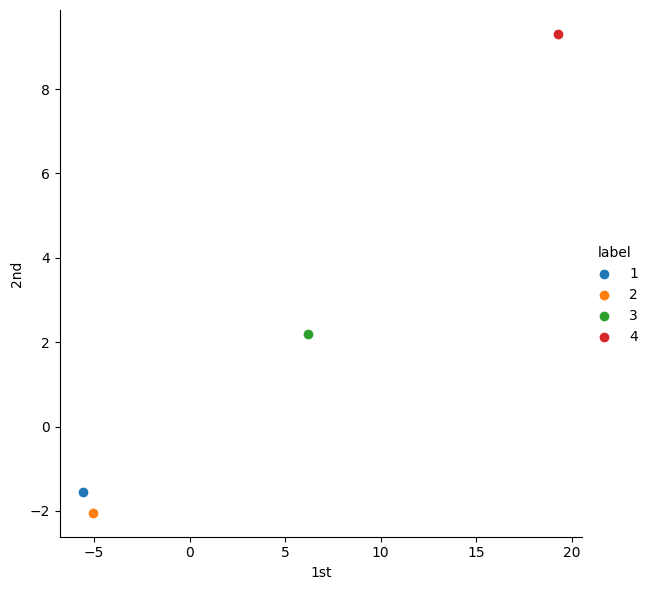

In [50]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.FacetGrid(df, hue="label", height=6).map(plt.scatter, '1st', '2nd').add_legend()
plt.show()

<Axes: xlabel='1st', ylabel='2nd'>

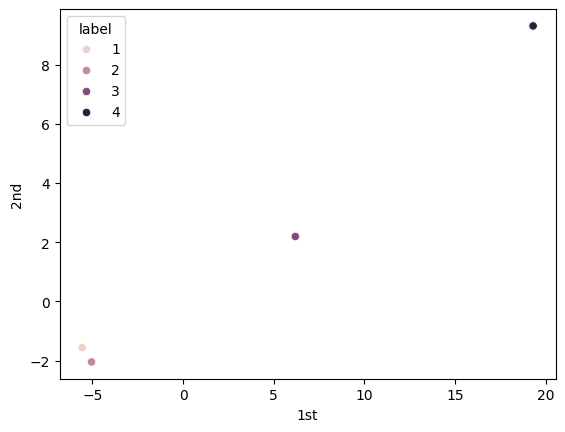

In [51]:
sn.scatterplot(x="1st",y="2nd",hue="label",data=df)

In [52]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

NameError: name 'dataframe' is not defined

In [53]:
sn.scatterplot(x="1st_principal",y="2nd_principal",legend="full",hue="label",data=dataframe)

NameError: name 'dataframe' is not defined

# PCA using Scikit-Learn

In [ ]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# configuring the parameteres.
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data.
print("shape of pca_reduced.shape = ", pca_data.shape)



In [ ]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA for dimensionality redcution (not for visualization)
PCA creates new variables by combining the original variables in such a way that the variance is maximized.

In [ ]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.

NameError: name 'pca' is not defined

# t-SNE using Scikit-Learn
t-SNE is a nonlinear dimensionality reduction technique that is well suited for embedding high dimension data into lower dimensional data (2D or 3D) for data visualization. While PCA works on retaining only global variance, t-SNE works on retaining local variance- a shortfall of PCA.


In [ ]:
# TSNE

from sklearn.manifold import TSNE

# Picking the top 1000 points as TSNE takes a lot of time for 15K points
data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

NameError: name 'standardized_data' is not defined

In [ ]:
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

NameError: name 'TSNE' is not defined

In [ ]:
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()

In [ ]:
model = TSNE(n_components=2, random_state=0, perplexity=2)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 2')
plt.show()

NameError: name 'TSNE' is not defined

In [ ]:
# Assignment

In [ ]:
#Run the same analysis using 42K points with various 
#values of perplexity and iterations.

# If you use all of the points, you can expect plots like this blog below:
# http://colah.github.io/posts/2014-10-Visualizing-MNIST/

SyntaxError: invalid decimal literal (103790321.py, line 1)